In [591]:
import importlib
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import pipeline as pp
import stats_hc as hc

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [592]:
importlib.reload(hc)
Stat = hc.Statistics("../datasets/sample/dataset.csv")

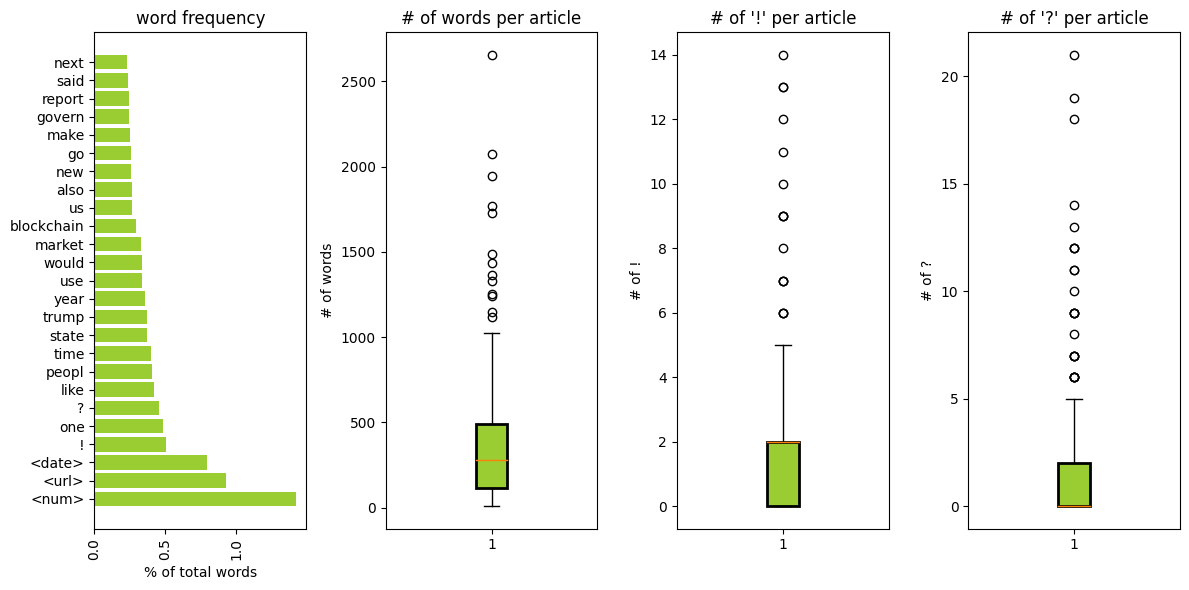

In [593]:
Stat.plot_word_frequency()

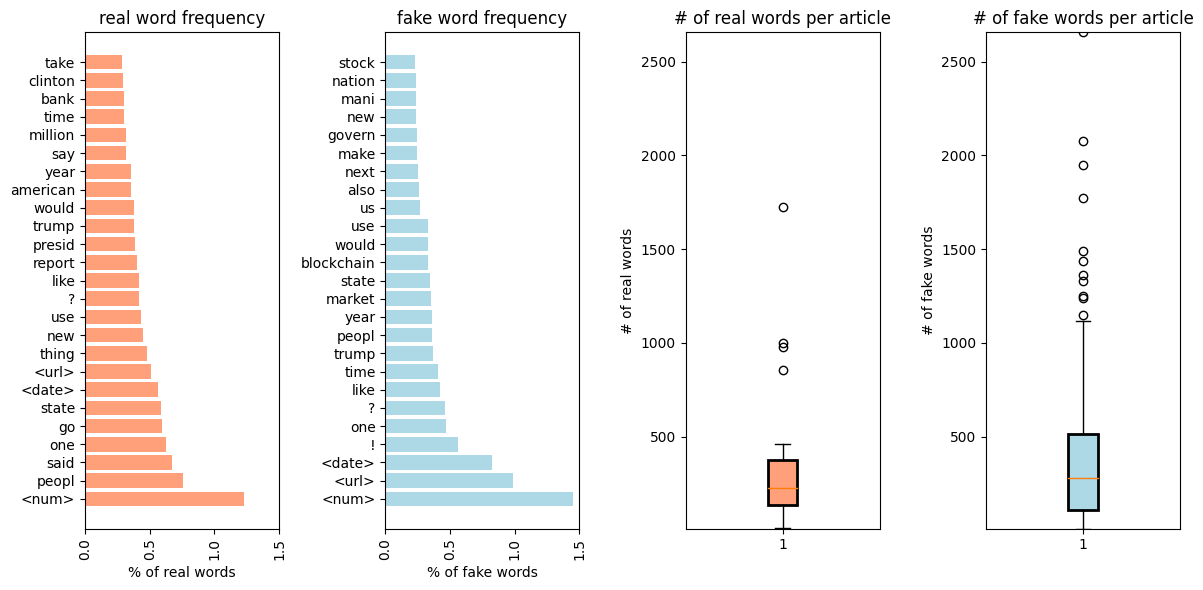

In [594]:
Stat.plot_word_frequency_fake_vs_real()

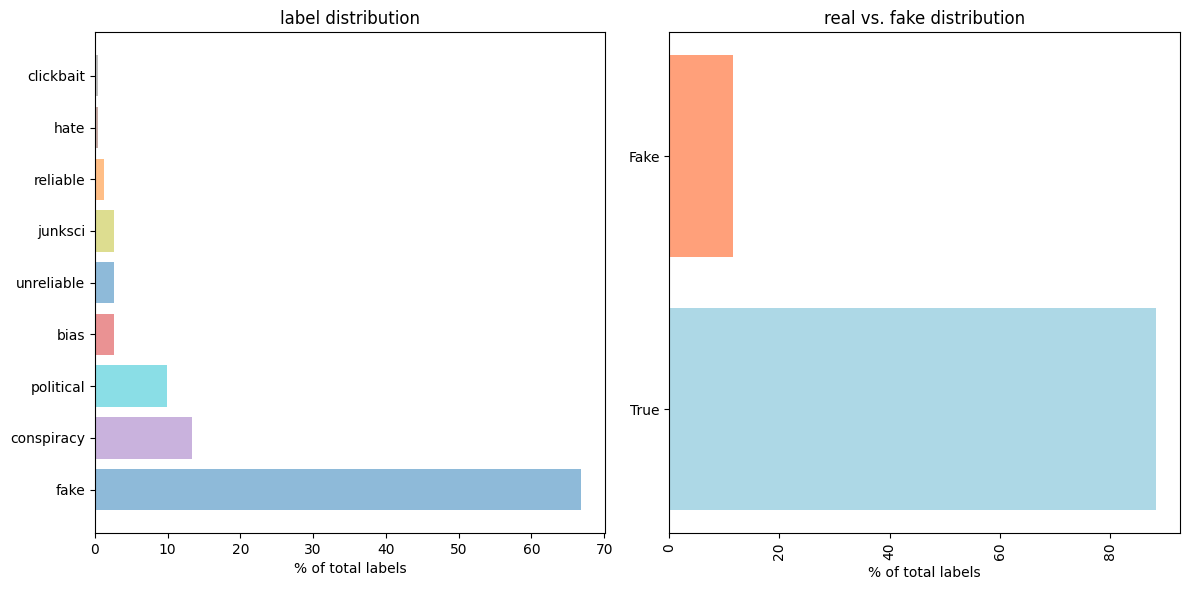

In [595]:
Stat.plot_type_fake_vs_real()


In [596]:
Stat.barplot_domain(percentage = True)

AttributeError: 'Statistics' object has no attribute 'barplot_domain_distribution'

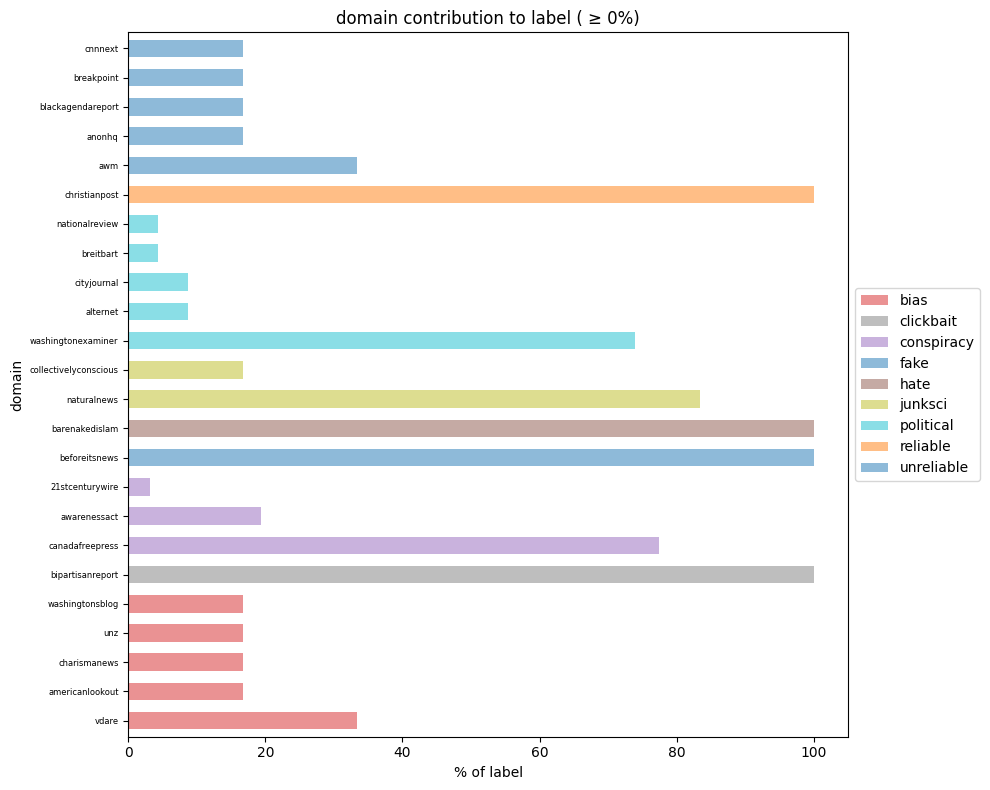

In [ ]:
Stat.barplot_domain_contribution(threshold=0, percentage=True)

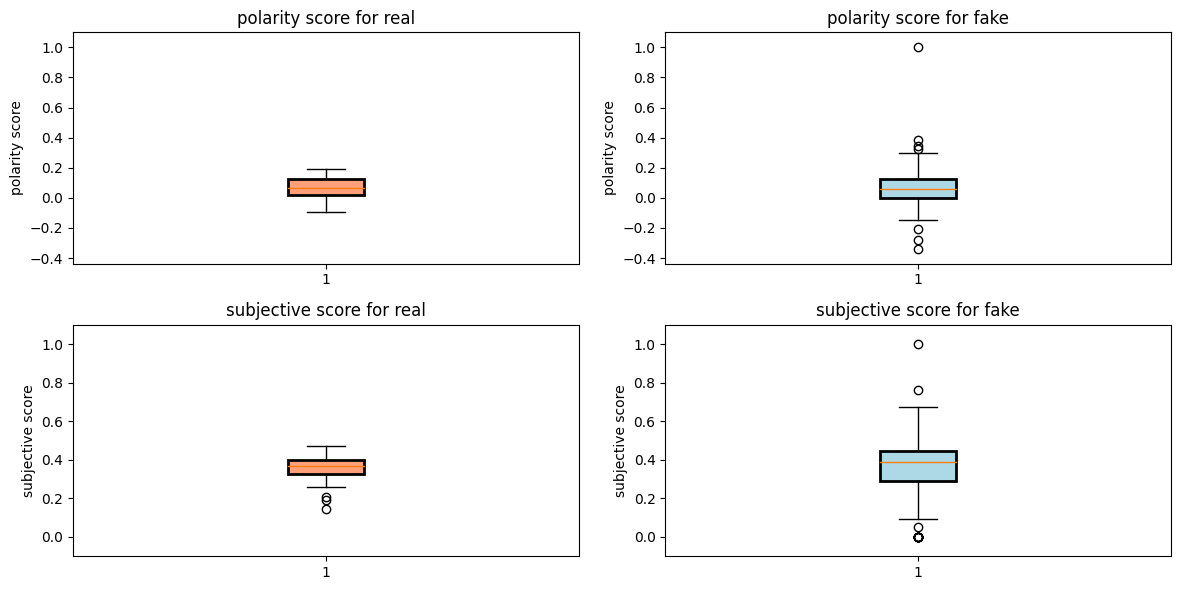

In [ ]:
Stat.plot_combined_sentence_analysis()

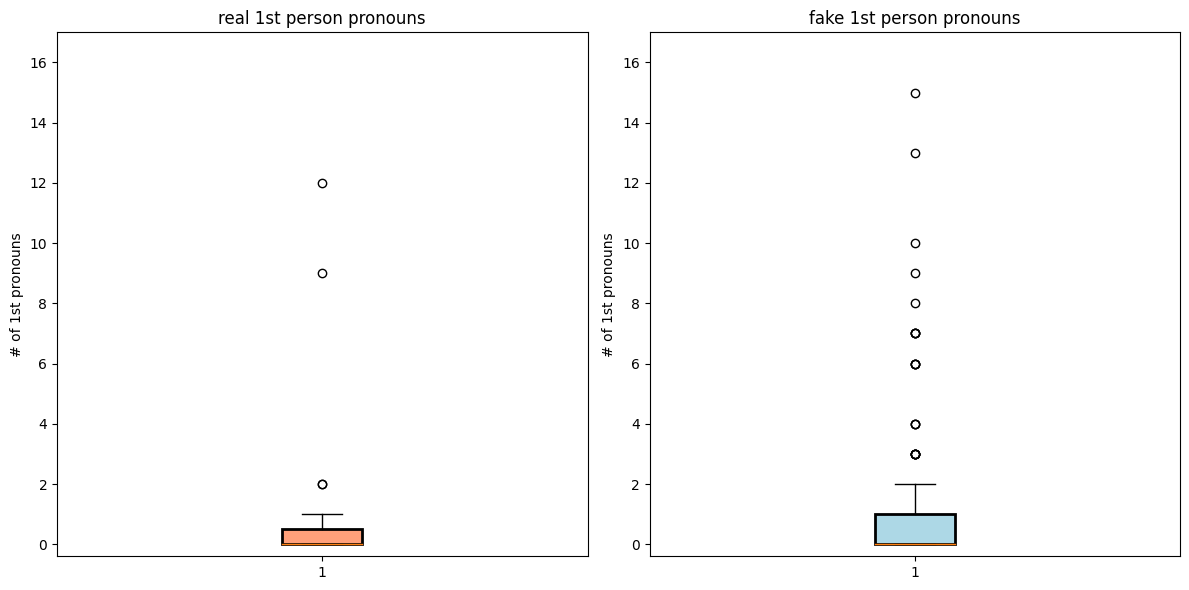

In [ ]:
Stat.plot_combined_fake_vs_real_first_person_pronouns()

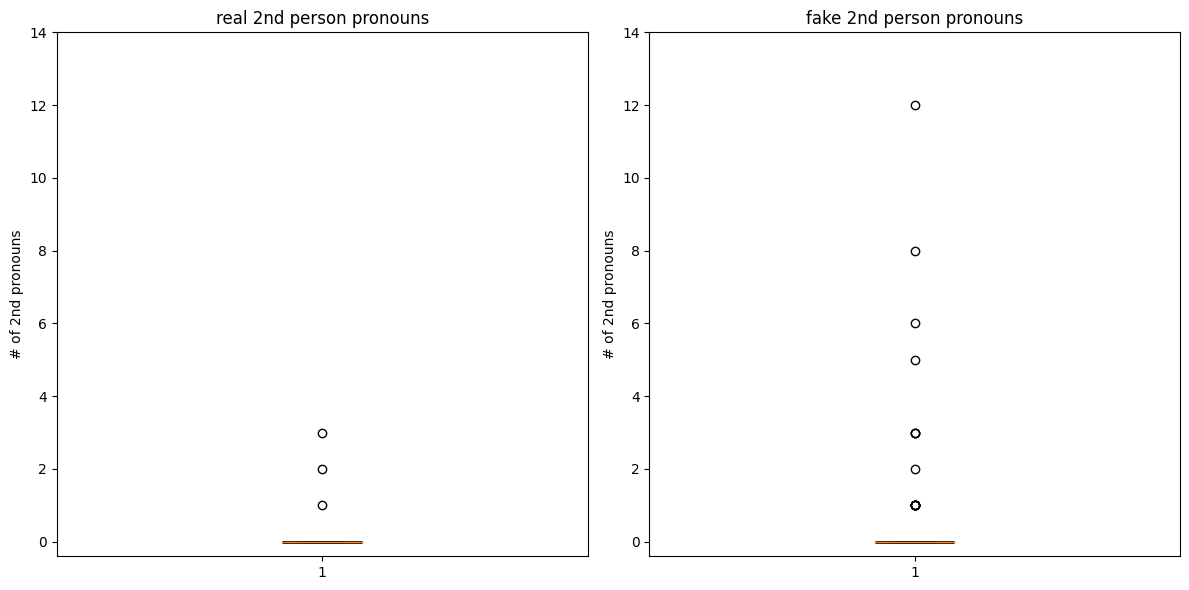

In [ ]:
Stat.plot_combined_fake_vs_real_second_person_pronouns()

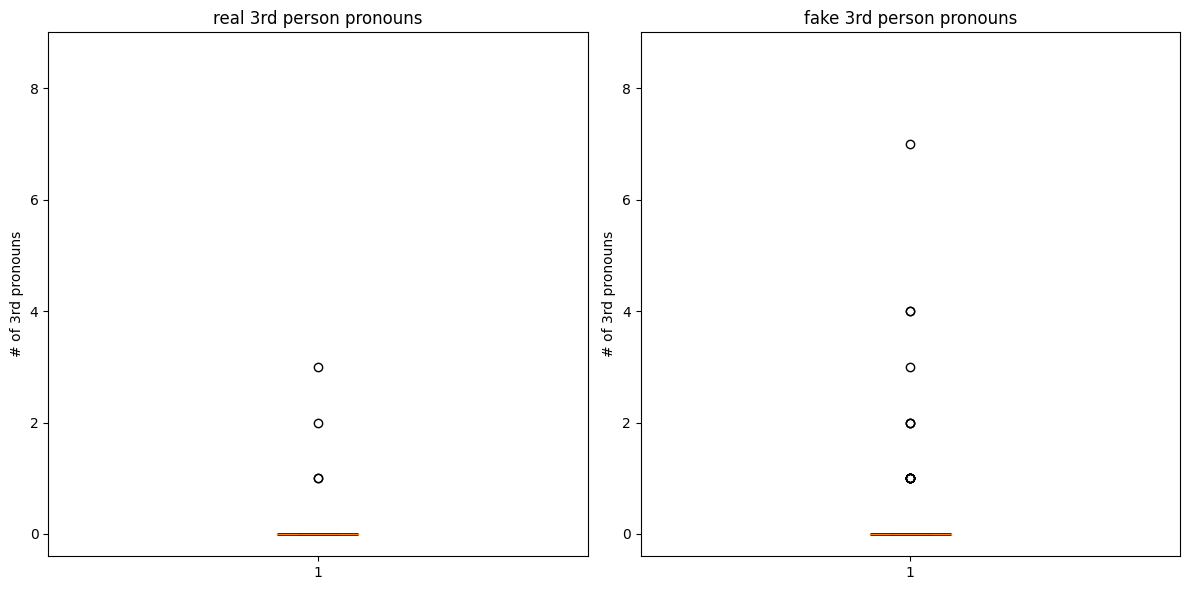

In [ ]:
Stat.plot_combined_fake_vs_real_third_person_pronouns()

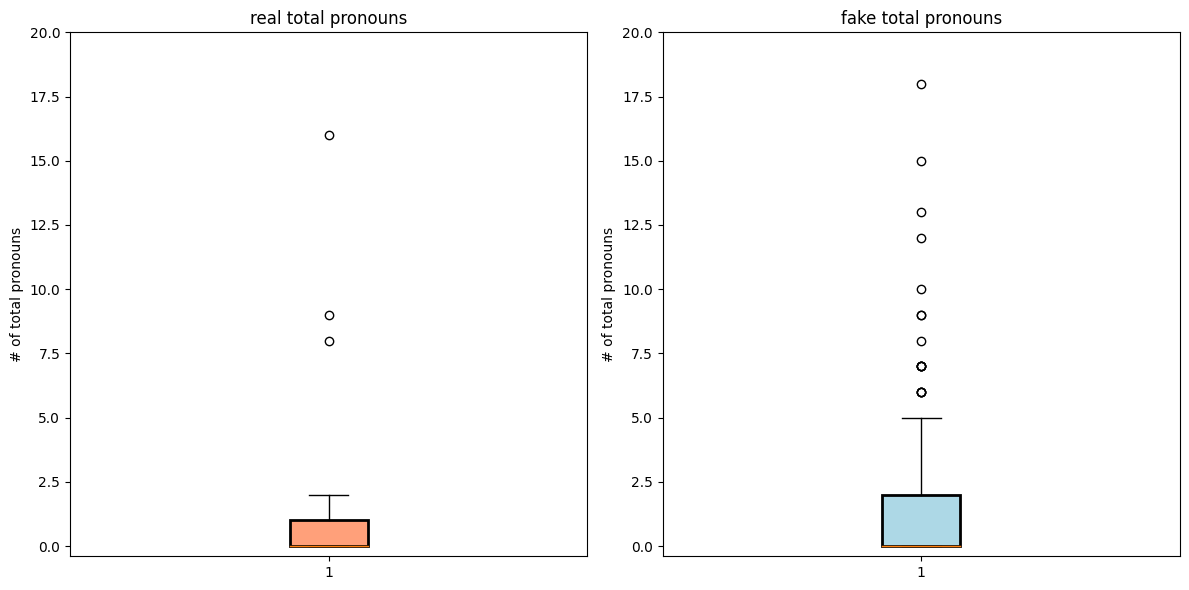

In [ ]:
Stat.plot_combined_fake_vs_real_pronouns_total()

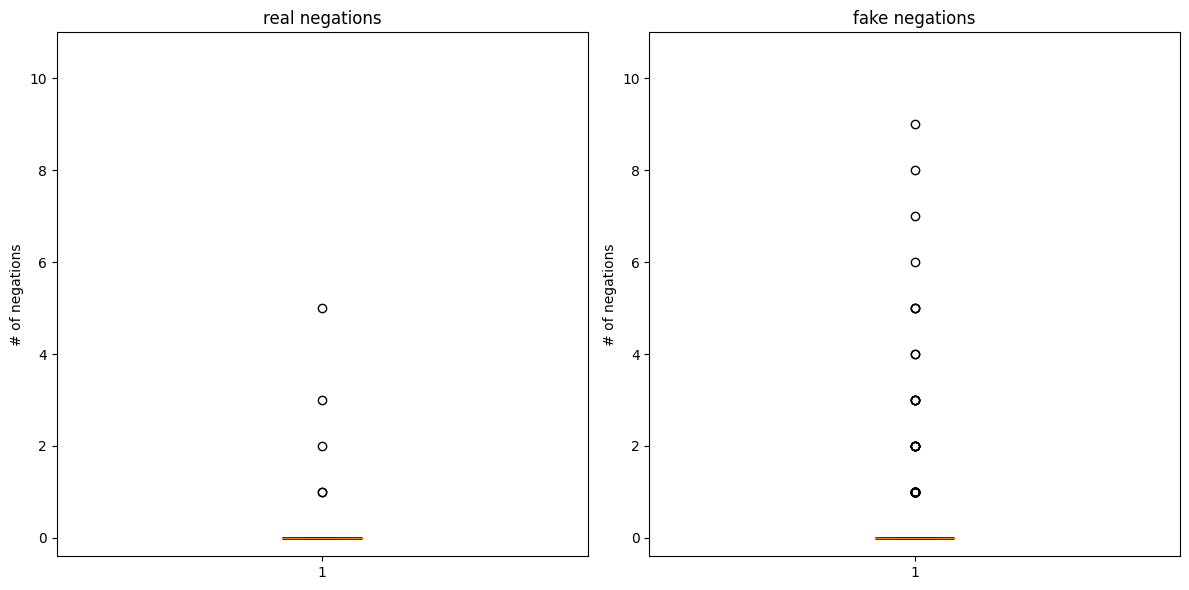

In [ ]:
Stat.plot_combined_fake_vs_real_negations()

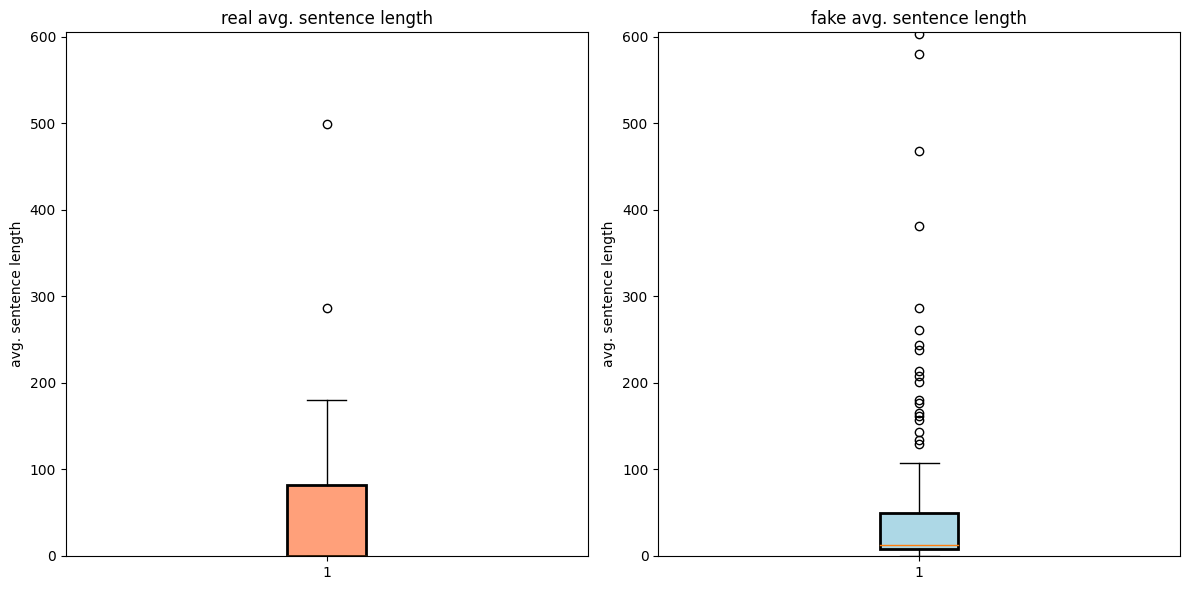

In [ ]:
Stat.plot_combined_fake_vs_real_sentence_length()